# CIFAR10 Dataset Compression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Outil.dataloader import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist, cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import os 
import glob

## Data Loading

In [79]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

X = np.concatenate([x_train, x_test])
X=X[:10000,:]
X.shape

(10000, 32, 32, 3)

## Loading the clusters

Here we'll load the clusters obtained from KMeans Clustering algorithm for different number of clusters into a dictionary for comparison purpose.

Note that the clusters are saved in `.\Clusters\` folder

In [3]:
cluster_path = "./Clusters/*.npy"   # Path to all .npy files
clusters = {}
for f in glob.glob(cluster_path):
    clusters[f[11:19]] = np.load(f,allow_pickle=True)

clusters

{'PCAKm1.n': array([0, 0, 0, ..., 0, 0, 0]),
 'PCAKm101': array([61, 34, 36, ..., 95, 26, 97]),
 'PCAKm105': array([51, 68, 82, ..., 20,  7, 37]),
 'PCAKm109': array([108, 102,  43, ...,  19,  13,  53]),
 'PCAKm113': array([ 36,  23, 106, ..., 111,  73,  83]),
 'PCAKm117': array([62,  1, 18, ...,  8, 74, 94]),
 'PCAKm121': array([108, 101,  54, ...,  47,  49,  85]),
 'PCAKm125': array([32, 81, 28, ..., 61, 17, 67]),
 'PCAKm129': array([ 37,  22,  96, ..., 104,  25,  39]),
 'PCAKm13.': array([ 7,  4,  1, ..., 11,  1,  9]),
 'PCAKm133': array([35, 89, 36, ..., 44, 12, 48]),
 'PCAKm137': array([ 66, 102, 111, ..., 114,  24,  47]),
 'PCAKm141': array([ 47, 112, 108, ..., 138,  13, 116]),
 'PCAKm145': array([110,  57,  25, ...,  65,  53,  75]),
 'PCAKm149': array([67, 65, 69, ..., 20,  1, 85]),
 'PCAKm153': array([143, 128,  59, ..., 138,  25, 145]),
 'PCAKm157': array([144,  61, 100, ...,  22,   9,  56]),
 'PCAKm17.': array([13, 14,  0, ..., 12,  0,  3]),
 'PCAKm21.': array([12, 13,  9, ..

## Apply Compression Methods

In [4]:
from Outil.compression import single_compression
import min_max_diff_flatten_mnist as mmdf 
import cv2

### Get the image sets (clusters)

####  Prepare the directories for saving the compressed images

In [5]:
for name, cluster in clusters.items():
    print(name)
    for value in np.unique(cluster):

        path = ".\Compression\ " + name  + "\ "

        if os.path.exists(path):
            # os.rmdir(path)
            files = glob.glob(path + '*')
            for f in files:
                os.remove(f)
        else:
            os.mkdir(path)

PCAKm1.n
PCAKm101
PCAKm105
PCAKm109
PCAKm113
PCAKm117
PCAKm121
PCAKm125
PCAKm129
PCAKm13.
PCAKm133
PCAKm137
PCAKm141
PCAKm145
PCAKm149
PCAKm153
PCAKm157
PCAKm17.
PCAKm21.
PCAKm25.
PCAKm29.
PCAKm33.
PCAKm37.
PCAKm41.
PCAKm45.
PCAKm49.
PCAKm5.n
PCAKm53.
PCAKm57.
PCAKm61.
PCAKm65.
PCAKm69.
PCAKm73.
PCAKm77.
PCAKm81.
PCAKm85.
PCAKm89.
PCAKm9.n
PCAKm93.
PCAKm97.


In [6]:
for name, cluster in clusters.items():
    print(name)
    for value in np.unique(cluster):
        image_set = X[cluster == value]
        compressed_set, min, max = mmdf.Encoder(image_set)

        # os.chdir(path)
        path = ".\Compression\ " + name  + "\ "

        for i in range(compressed_set.shape[0]):
            cv2.imwrite(path + "cluster" + str(value) + 'im' + str(i) + ".png", compressed_set[i].reshape((28,28,-1)))
        
        #cv2.imwrite(path + "min" + str(value) + ".png", min.reshape((32,32,-1)))
        #cv2.imwrite(path + "max" + str(value) + ".png", max.reshape((32,32,-1)))
        cv2.imwrite(path + "min" + str(value) + ".png", min.reshape((28,28,-1)))
        cv2.imwrite(path + "max" + str(value) + ".png", max.reshape((28,28,-1)))


PCAKm1.n
PCAKm101
PCAKm105
PCAKm109
PCAKm113
PCAKm117
PCAKm121
PCAKm125
PCAKm129
PCAKm13.
PCAKm133
PCAKm137
PCAKm141
PCAKm145
PCAKm149
PCAKm153
PCAKm157
PCAKm17.
PCAKm21.
PCAKm25.
PCAKm29.
PCAKm33.
PCAKm37.
PCAKm41.
PCAKm45.
PCAKm49.
PCAKm5.n
PCAKm53.
PCAKm57.
PCAKm61.
PCAKm65.
PCAKm69.
PCAKm73.
PCAKm77.
PCAKm81.
PCAKm85.
PCAKm89.
PCAKm9.n
PCAKm93.
PCAKm97.


#### Get size of compressed images

In [7]:
import re

In [8]:
liste_num=[]
for name in clusters:
    liste_num.append([float(s) for s in re.findall(r'-?\d+\.?\d*', name)])

In [9]:
liste_num=np.ravel(np.array(liste_num)).astype(int)

In [10]:
liste_size=[]
for name in clusters:
    path = ".\Compression\ " + name  + "\ "
    size = 0
    for f in glob.glob(path + "*.png"):
        size = size + os.path.getsize(f)
    
    liste_size.append(size)
liste_size=np.ravel(liste_size)   #np.save(".mmdf_" + name + "_png_size.npy", size)

In [11]:
liste_size.shape[0]

40

In [12]:
liste_graph=np.array([[liste_num],[liste_size]]).reshape(2,liste_size.shape[0])
a=np.sort(liste_graph[0])

In [13]:
l=0
o=0
for i in range(len(a)):
    j=0
    h=0
    while j==0:
        if a[i]==liste_graph[0][h]:
            j+=1
            l=liste_graph[0][i]
            o=liste_graph[1][i]
            liste_graph[0][i]=liste_graph[0][h]
            liste_graph[1][i]=liste_graph[1][h]
            liste_graph[0][h]=l
            liste_graph[1][h]=o
        h+=1

In [14]:
#i=np.where(liste_graph[1]==np.amin(liste_graph[1]))
#print(liste_graph[0,i])

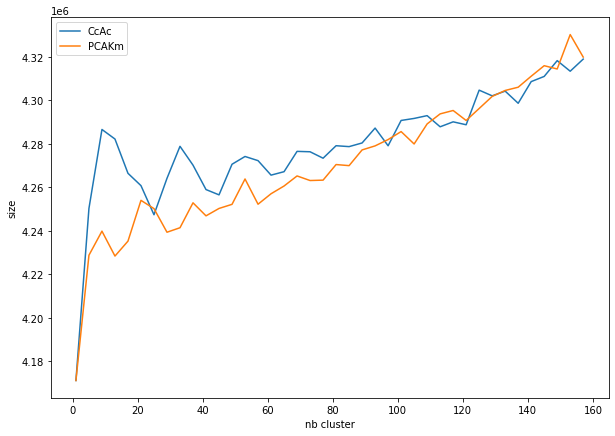

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,7))
line=plt.plot(liste_graph[0],liste_graph[1], label='CcAc')
#line1=plt.plot(liste_graph1[0],liste_graph1[1], label='Kmeans')
#line2=plt.plot(liste_graph2[0],liste_graph2[1], label='CcKm')
#line3=plt.plot(liste_graph3[0],liste_graph3[1], label='AC')
#line4=plt.plot(liste_graph4[0],liste_graph4[1], label='PSNR')
#line5=plt.plot(liste_graph5[0],liste_graph5[1], label='PCAAc')
line6=plt.plot(liste_graph6[0],liste_graph6[1], label='PCAKm')
#scale=plt.plot(np.arange(1,160,4),np.full(40,880000)) #Mnist scale
#scale=plt.plot(np.arange(1,100,4),np.full(25,liste_graph[1,i]))

plt.ylabel('size')
plt.xlabel('nb cluster')
#plt.title('Compression with clusters of features with a different Cifar10 (n=5e3)')
#plt.setp(line1, color='r')
#plt.setp(line2, color='b')
#plt.setp(line3, color='g')
#plt.setp(line4, color='k')
#plt.setp(line5, color='m')
#plt.setp(scale, color='y', linestyle='--')
plt.legend()
plt.show()

In [35]:
#np.save(r'.\résultats\Cifar-10\Min-Max flatten\10k\PCa_Ac.npy', liste_graph)
#np.save(r'.\résultats\Cifar-10\tuning_CcKm.npy', liste_graph)
liste_graph1=np.load(r'.\résultats\Mnist\Min-Max flatten\10k\Kmeans.npy')
liste_graph2=np.load(r'.\résultats\Mnist\Min-Max flatten\10k\CcKm.npy')
liste_graph3=np.load(r'.\résultats\Mnist\Min-Max flatten\10k\Ac.npy')
liste_graph4=np.load(r'.\résultats\Mnist\Min-Max flatten\10k\PSNR.npy')
liste_graph5=np.load(r'.\résultats\Mnist\Min-Max flatten\10k\PCa_Ac.npy')
liste_graph6=np.load(r'.\résultats\Mnist\Min-Max flatten\10k\PCa_Km.npy')
liste_graph=np.load(r'.\résultats\Mnist\Min-Max flatten\10k\CcAc.npy')

In [27]:
liste_graph5=liste_graph

In [99]:
labels=np.load(r'.\cifar10 clust\Pca_KM 10k\PCAKm125.npy .npy')

In [100]:
labels

array([ 63, 106,   7, ...,  46,  51,  90])

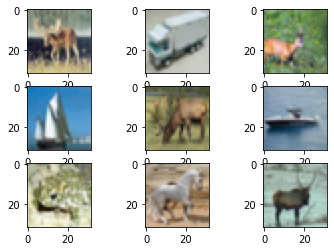

In [102]:
cluster1=X[np.where(labels==2)]
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(cluster1[i], cmap=plt.get_cmap('gray'))
plt.show()

## Min Max Predictive

In [9]:
import min_max_predictive as mmp

####  Prepare the directories for saving the compressed images

In [37]:
for name, cluster in clusters.items():
    print(name)
    for value in np.unique(cluster):

        path = ".\Compression\ " + name  + "\ "

        if os.path.exists(path):
            # os.rmdir(path)
            files = glob.glob(path + '*')
            for f in files:
                os.remove(f)
        else:
            os.mkdir(path)

cifar10.
CofC_ac_
CofC_km_
kmeans20


In [38]:
for name, cluster in clusters.items():
    print(name)
    for value in np.unique(cluster):
        image_set = X[cluster == value]
        compressed_set, level, min, max = mmp.Encoder(image_set)

        # os.chdir(path)
        path = ".\Compression\ " + name  + "\ "

        for i in range(compressed_set.shape[0]):
            cv2.imwrite(path + "cluster" + str(value) + 'im' + str(i) + ".png", compressed_set[i])
        
        np.save(path + "level" + str(value) + ".npy", level)
        cv2.imwrite(path + "min" + str(value) + ".png", min)
        cv2.imwrite(path + "max" + str(value) + ".png", max)


cifar10.
CofC_ac_
CofC_km_
kmeans20


#### Get size of compressed images

In [40]:
for name in clusters:
    path = ".\Compression\ " + name  + "\ "

    size = 0
    for f in glob.glob(path + "*.png"):
        size = size + os.path.getsize(f)
    for f in glob.glob(path + "*.npy"):
        size = size + os.path.getsize(f)
    
    print(size)
    np.save(".mmdf_" + name + "_png_size.npy", size)

11112362
11311116
11302387
11535596


## Combine with Delta Encoding

In [41]:
import delta

####  Prepare the directories for saving the compressed images

In [42]:
for name, cluster in clusters.items():
    print(name)
    for value in np.unique(cluster):

        path = ".\Compression\ " + name  + "\ "

        if os.path.exists(path):
            # os.rmdir(path)
            files = glob.glob(path + '*')
            for f in files:
                os.remove(f)
        else:
            os.mkdir(path)

cifar10.
CofC_ac_
CofC_km_
kmeans20


In [43]:
for name, cluster in clusters.items():
    print(name)
    for value in np.unique(cluster):
        image_set = X[cluster == value]
        image_set = delta.Delta_Encoder(image_set)
        compressed_set, min, max = mmdf.Encoder(image_set)
        

        # os.chdir(path)
        path = ".\Dataset\Compressed\delta_mmdf_png\ " + name  + "\ "

        for i in range(compressed_set.shape[0]):
            cv2.imwrite(path + "cluster" + str(value) + 'im' + str(i) + ".png", compressed_set[i])
        
        cv2.imwrite(path + "min" + str(value) + ".png", min)
        cv2.imwrite(path + "max" + str(value) + ".png", max)


cifar10.
CofC_ac_
CofC_km_
kmeans20


#### Get size of compressed images

In [44]:
for name in clusters:
    path = ".\Compression\ " + name  + "\ "

    size = 0
    for f in glob.glob(path + "*.png"):
        size = size + os.path.getsize(f)
    
    print(size)
    np.save(".mmdf_" + name + "_png_size.npy", size)

0
0
0
0


## Delta and PNG

####  Prepare the directories for saving the compressed images

In [45]:

path_png = ".\Compression\delta_png\ "

if os.path.exists(path_png):
    # os.rmdir(path_png)
    files = glob.glob(path_png + '*')
    for f in files:
        os.remove(f)
else:
    os.mkdir(path_png)

# os.chdir(path_png)

X_delta = delta.Delta_Encoder(X)

for i in range(X.shape[0]):
    cv2.imwrite(path_png + str(i) + ".png", X_delta[i,:,:,:])


#### Get size of compressed images

In [46]:

path = ".\Compression\delta_png\ "

size = 0
for f in glob.glob(path + "*.png"):
    size = size + os.path.getsize(f)

print(size)
np.save(".mmdf_" + name + "_png_size.npy", size)

4602876
